Naivedya Rai Support Vector Machine Classifier - lab 9



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/navi/Downloads/Social_Network_Ads (1).csv", engine='python', encoding='utf-8')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.nunique()

User ID            400
Gender               2
Age                 43
EstimatedSalary    117
Purchased            2
dtype: int64

In [6]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
df.shape

(400, 5)

## EDA 

#### Univariate Analysis

In [8]:
# checking for null values
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
# checking for duplicate values
df.duplicated().sum()

0

In [10]:
# dropping user id
df.drop(columns=['User ID'],inplace=True)


In [11]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [12]:
df['Gender'].value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

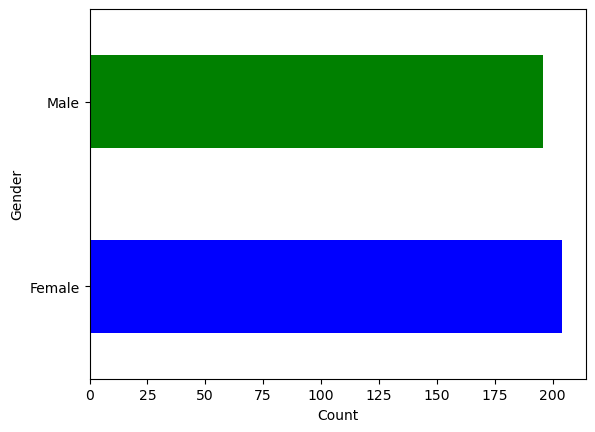

In [13]:


# Define the colors you want to use for each bar
colors = ['blue', 'green']

# Create the bar plot
df['Gender'].value_counts().plot(kind='barh', color=colors)

# You can also set labels for the bars if needed
plt.xlabel("Count")
plt.ylabel("Gender")

# Show the plot
plt.show()


In [14]:
df['Age'].value_counts()

35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64

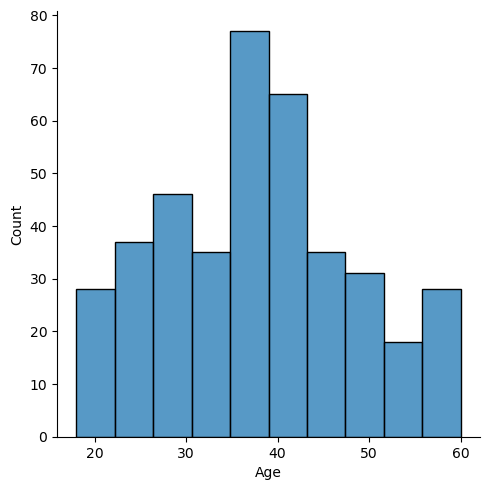

In [15]:
sns.displot(df['Age'])

In [16]:
df['Age'].describe()

count    400.000000
mean      37.655000
std       10.482877
min       18.000000
25%       29.750000
50%       37.000000
75%       46.000000
max       60.000000
Name: Age, dtype: float64

We can observe that the age is normally distributed around 37 years old.

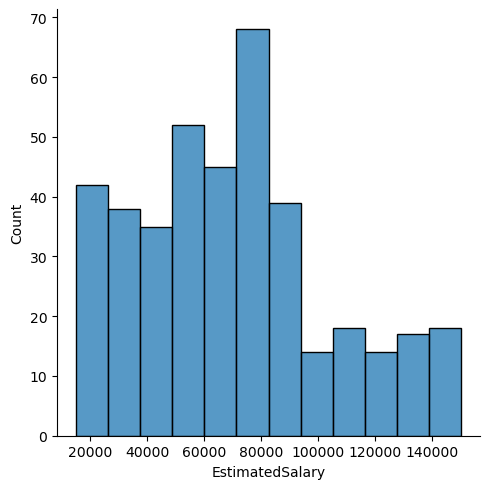

In [17]:
sns.displot(df['EstimatedSalary'])

In [18]:
df["EstimatedSalary"].describe()

count       400.000000
mean      69742.500000
std       34096.960282
min       15000.000000
25%       43000.000000
50%       70000.000000
75%       88000.000000
max      150000.000000
Name: EstimatedSalary, dtype: float64

We can observe that the estimated salary is normally distributed around $70000

#### Bivariate Analysis

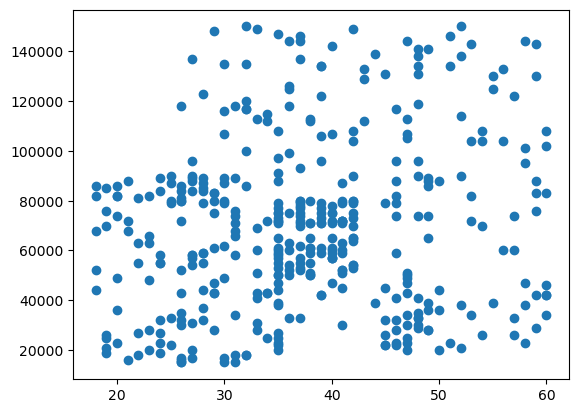

In [19]:
# relation between age and EstimatedSalary
plt.scatter(x='Age',y='EstimatedSalary',data=df)

We can observe that there is no apparent relation between age and estimated salary

<AxesSubplot:xlabel='Age', ylabel='Gender'>

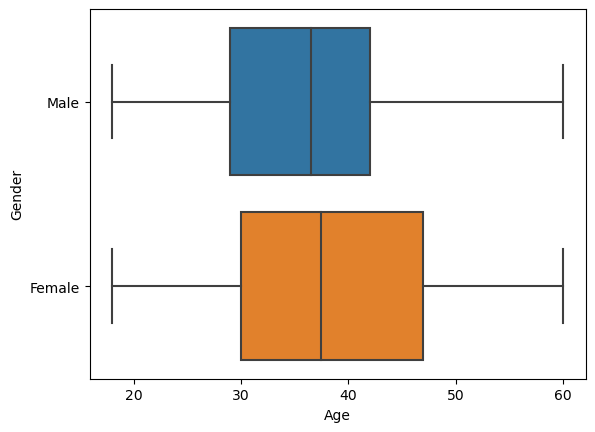

In [20]:
sns.boxplot(x='Age',y='Gender',data=df)

We can observe that the female demography contains more older individuals than the male demography.

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Gender'>

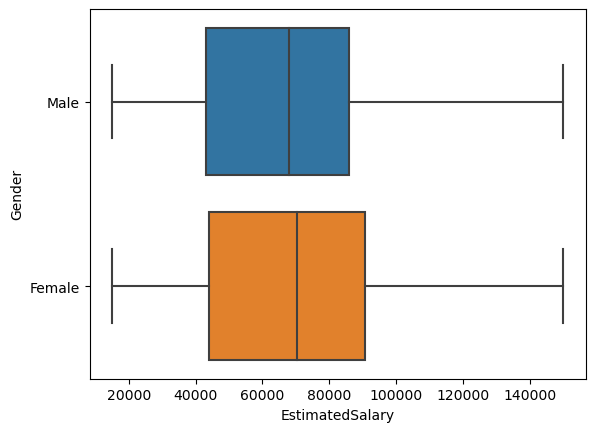

In [21]:
sns.boxplot(x='EstimatedSalary',y='Gender',data=df)

We can observe that the estimated salary of males and females is approximately the same.

<AxesSubplot:xlabel='Age', ylabel='Gender'>

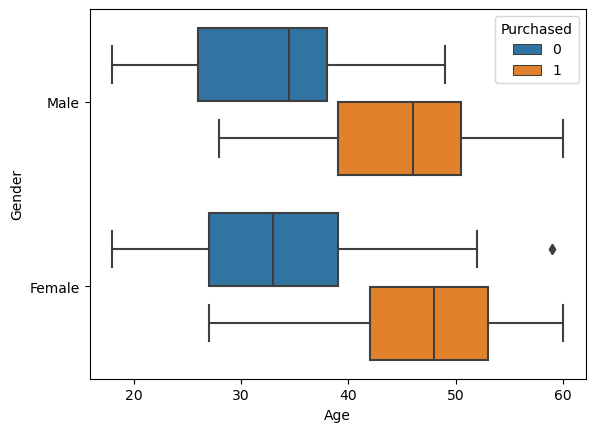

In [22]:
sns.boxplot(x='Age',y='Gender',data=df, hue='Purchased')

It can be seen that older age members of male and female demography are more probable to purchase than younger ones

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

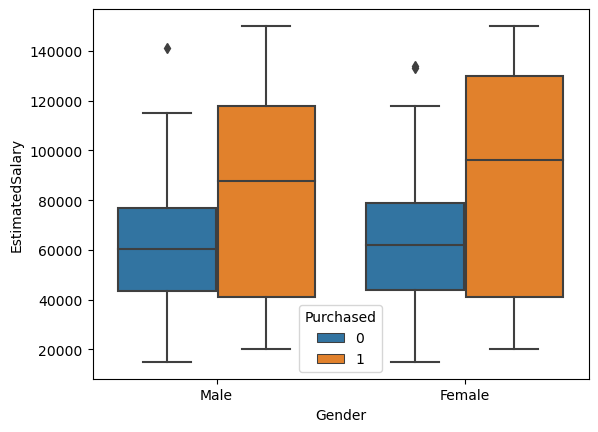

In [23]:
sns.boxplot(x='Gender',y='EstimatedSalary',data=df, hue='Purchased')

The mean and median of estimated salary of female demography are greater than that of the male demography. Also, people with high salary are the most probable to purchase the product.

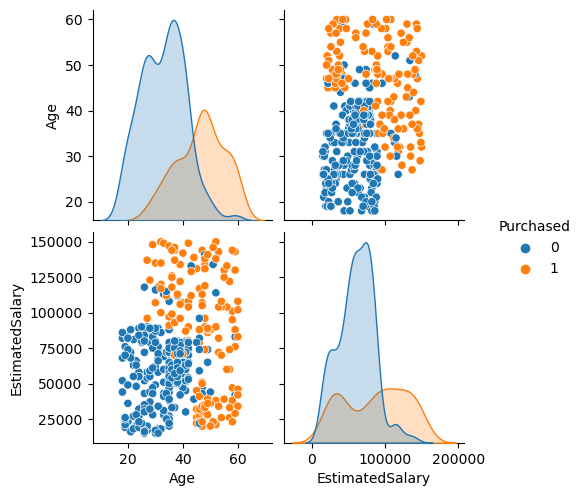

In [24]:
sns.pairplot(df, hue="Purchased")

## Model Training

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, mean_squared_error

In [26]:
#feature variable or independent variable
x_feat = df.iloc[:,:-1]
x_feat

,Gender,Age,EstimatedSalary
0,Male,19,19000
1,Male,35,20000
2,Female,26,43000
3,Female,27,57000
4,Male,19,76000
...,...,...,...
395,Female,46,41000
396,Male,51,23000
397,Female,50,20000
398,Male,36,33000


In [27]:
#target variable
y_feat = df.iloc[:,-1]
y_feat.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [28]:
print('Shape of x_feat =',x_feat.shape)
print('Shape of y_feat =',y_feat.shape)

Shape of x_feat = (400, 3)
Shape of y_feat = (400,)


In [29]:
#Encoding Categorical data i.e. Gender
le = LabelEncoder()
x_feat['Gender']=le.fit_transform(x_feat.iloc[:,0])

In [30]:
x_feat

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [31]:
#Getting datatype of Gender column after encoding
x_feat.dtypes

Gender             int64
Age                int64
EstimatedSalary    int64
dtype: object

In [32]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x_feat,y_feat,test_size=0.2, random_state=42)

In [33]:
print('Shape of x_train =',x_train.shape)
print('Shape of y_train =',y_train.shape)
print('Shape of x_test =',x_test.shape)
print('Shape of y_test =',y_test.shape)

Shape of x_train = (320, 3)
Shape of y_train = (320,)
Shape of x_test = (80, 3)
Shape of y_test = (80,)


<AxesSubplot:xlabel='Age', ylabel='Density'>

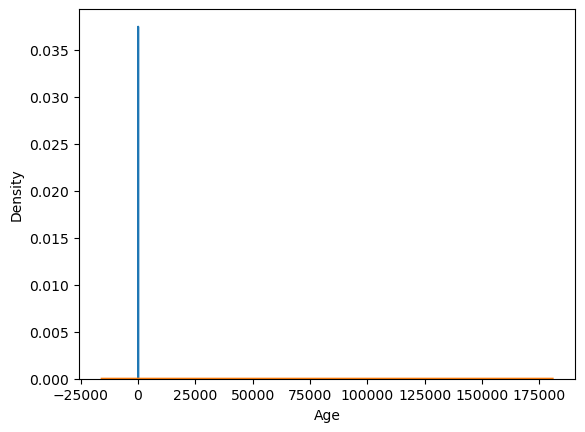

In [34]:
sns.kdeplot(df['Age'])
sns.kdeplot(df['EstimatedSalary'])

We can observe that the data is distributed in a wide range (i.e. the difference between max and min values are very high). Hence we have to normalize the data to fit in a predefined range for ease in calculation.

In [35]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)

In [36]:
x_train = pd.DataFrame(x_train)
x_train.describe()

,0,1,2
count,320.000000,3.200000e+02,3.200000e+02
mean,0.000000,-2.525757e-16,9.367507e-18
std,1.001566,1.001566e+00,1.001566e+00
min,-1.000000,-1.949836e+00,-1.608102e+00
25%,-1.000000,-7.723913e-01,-7.935968e-01
50%,0.000000,-8.554870e-02,2.090805e-02
75%,1.000000,6.994143e-01,5.154289e-01
max,1.000000,2.171220e+00,2.318975e+00


In [37]:
x_test = pd.DataFrame(x_test)
x_test.describe()


,0,1,2
count,80.000000,80.000000,80.000000
mean,-0.100000,-0.106399,-0.078360
std,1.001265,1.132999,0.955593
min,-1.000000,-1.949836,-1.491744
25%,-1.000000,-0.968632,-0.800869
50%,-1.000000,-0.232729,-0.153629
75%,1.000000,0.895655,0.384526
max,1.000000,2.171220,2.144439


We can now observe that our Standard Deviation has reduced drastically to 1.001

Now we train the base version of our SVM Model.

In [38]:
svm =SVC() 
svm.fit(x_train,y_train)

SVC()

In [39]:
lr_training_score = svm.score(x_train, y_train)*100
print('Training Score of Logistic Regression Model =',lr_training_score,'%')

Training Score of Logistic Regression Model = 91.25 %


In [40]:
#Testing the model
y_pred_svm = svm.predict(x_test)
y_pred_svm

array([1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0])

In [41]:
lr_testing_score = svm.score(x_test,y_test)*100
print('Testing Score of Logistic Regression =',lr_testing_score,'%')

Testing Score of Logistic Regression = 92.5 %


<AxesSubplot:>

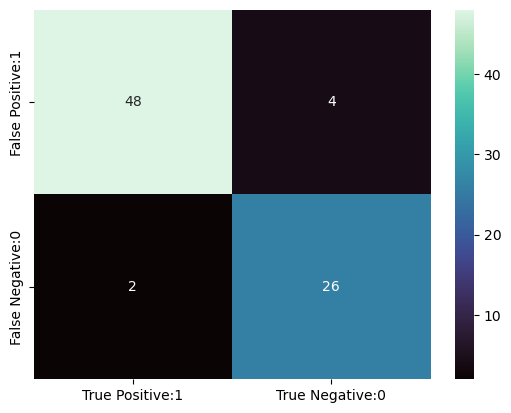

In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
cm_matrix = pd.DataFrame(data=cm, columns=['True Positive:1', 'True Negative:0'], 
                                 index=['False Positive:1', 'False Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



As our test score is greater than our treaining score, this can mean either of the following - 

i) The model has underfitted to the harder patterns
ii) There is gaussian noise in the dataset
iii) Might be a result of train test split

Let's now try different kernels for SVM

LINEAR KERNEL

It is the most basic type of kernel, usually one dimensional in nature. It proves to be the best function when there are lots of features.

Linear kernel functions are faster than other functions

In [44]:
# Apply SVM model using Linear Kernel function 
linear_classifier=SVC(kernel='linear').fit(x_train,y_train)
y_pred = linear_classifier.predict(x_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with linear kernel : 0.863


<AxesSubplot:>

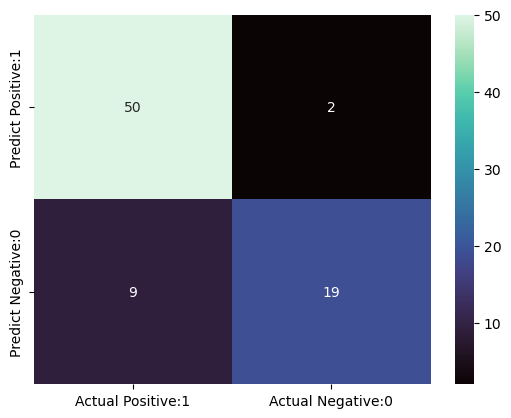

In [45]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [46]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90        52
           1       0.90      0.68      0.78        28

    accuracy                           0.86        80
   macro avg       0.88      0.82      0.84        80
weighted avg       0.87      0.86      0.86        80



Gaussian RBF kernel

It is one of the most preferred and used kernel functions in svm. It is usually chosen for non-linear data. It helps to make proper separation when there is no prior knowledge of data.

In [47]:
# Apply SVM model using Gaussian RBF kernel function 
rbf_svc=SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.925


<AxesSubplot:>

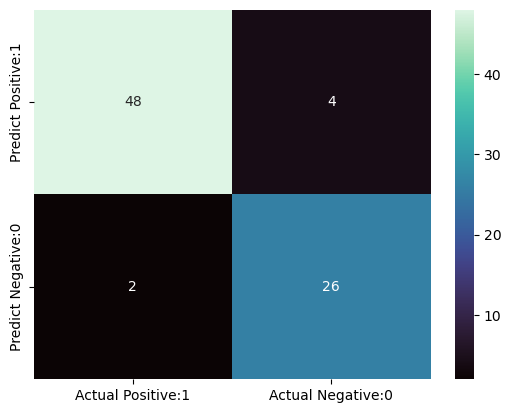

In [48]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [49]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94        52
           1       0.87      0.93      0.90        28

    accuracy                           0.93        80
   macro avg       0.91      0.93      0.92        80
weighted avg       0.93      0.93      0.93        80



Polynomial Kernel

It is a more generalized representation of the linear kernel. It is not as preferred as other kernel functions as it is less efficient and accurate.

In [50]:
# Apply SVM model using Polynomial Kernel function
Poly_svc=SVC(kernel='poly', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.912


<AxesSubplot:>

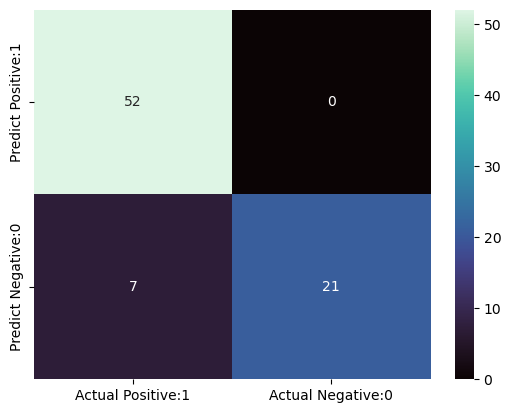

In [51]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [52]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        52
           1       1.00      0.75      0.86        28

    accuracy                           0.91        80
   macro avg       0.94      0.88      0.90        80
weighted avg       0.92      0.91      0.91        80



Sigmoid Kernel

It is mostly preferred for neural networks. This kernel function is similar to a two-layer perceptron model of the neural network, which works as an activation function for neurons.

In [53]:
# Apply SVM model using Sigmoid Kernel function
Poly_svc=SVC(kernel='sigmoid', C=1).fit(x_train,y_train)
y_pred = Poly_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.912


<AxesSubplot:>

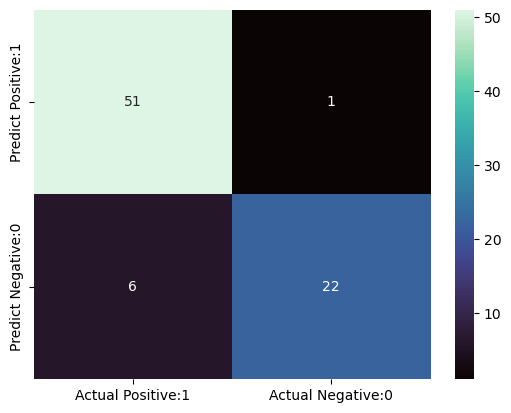

In [54]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [55]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94        52
           1       0.96      0.79      0.86        28

    accuracy                           0.91        80
   macro avg       0.93      0.88      0.90        80
weighted avg       0.92      0.91      0.91        80



Among all these above kernels Gaussian RBF kernel is giving more accurate Prediction. The model accuracy with Gaussian RBF kernel is 0.925